## RedCrow Hosting Companies Twitter Data Analysis for CenterlineBio



In [1]:
#Loading necessary libraries
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,ENGLISH_STOP_WORDS
from nltk import word_tokenize
import re
from langdetect import detect_langs
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
import nltk
import csv
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from itertools import islice
from pylab import rcParams
import seaborn as sns
from collections import Counter
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr
import nltk
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

In [2]:
#CenterLineBio
#Importing dataset locally and creataing a new dataframe for the sentiment analysis output
data = pd.read_csv("CenterlineBio.csv")
COLS = ['date','tweets', 'sentiment','subjectivity','polarity']
df = pd.DataFrame(columns=COLS)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
date     200 non-null object
tweet    200 non-null object
dtypes: object(2)
memory usage: 3.2+ KB


In [4]:
len(df)

0

#### Sentiment Analysis

In [5]:
#Sentiment Analysis
for index, row in islice(data.iterrows(), 0, None):

     new_entry = []
     text=(row['tweet'])
     blob = TextBlob(text)
     sentiment = blob.sentiment
     polarity = sentiment.polarity
     subjectivity = sentiment.subjectivity
     new_entry += [row['date'],text,sentiment,subjectivity,polarity]
        
     single_sentiment_df = pd.DataFrame([new_entry], columns=COLS)
     df = df.append(single_sentiment_df, ignore_index=True)
df.to_csv('CenterLineBio_Sentiment_Values.csv', mode='w', columns=COLS, index=False, encoding="utf-8")


In [6]:
#Viewing the sentiment resultls
df.head()

,date,tweets,sentiment,subjectivity,polarity
0,22-04-2020 12:14,Surgical navigation startup wins fourth small ...,"(0.016666666666666663, 0.20000000000000004)",0.2,0.016667
1,18-11-2019 17:08,FDA-cleared 3D Endovascular Guiding System to ...,"(0.0, 0.0)",0.0,0.000000
2,12-11-2019 14:40,Centerline Biomedical's Intra-Operative Positi...,"(0.0, 0.0)",0.0,0.000000
3,22-10-2019 18:40,Centerline Biomedical Announces Philip D. Rack...,"(0.3, 0.4)",0.4,0.300000
4,21-10-2019 19:46,Centerline Biomedical Announces Philip D. Rack...,"(0.3, 0.4)",0.4,0.300000


In [7]:
#Separating date and time columns
df['Dates'] = pd.to_datetime(df['date']).dt.date
df['Time'] = pd.to_datetime(df['date']).dt.time

#Rremoving the original timestamp column
df= df.drop(['date'], axis=1)

In [8]:
df.describe()

,subjectivity,polarity
count,200.000000,200.000000
mean,0.310008,0.139666
std,0.273889,0.256657
min,0.000000,-0.600000
25%,0.000000,0.000000
50%,0.304167,0.012879
75%,0.500000,0.244697
max,1.000000,1.000000


In [9]:
#Since median is 0, which might be coincidental, trying it with only non-zero values in data
dffilter = df.loc[(df.loc[:, df.dtypes != object] != 0).any(1)]

In [10]:
dffilter.describe()

,subjectivity,polarity
count,142.000000,142.000000
mean,0.436630,0.196712
std,0.224038,0.285776
min,0.000000,-0.600000
25%,0.300000,0.000000
50%,0.453701,0.152917
75%,0.544091,0.318182
max,1.000000,1.000000


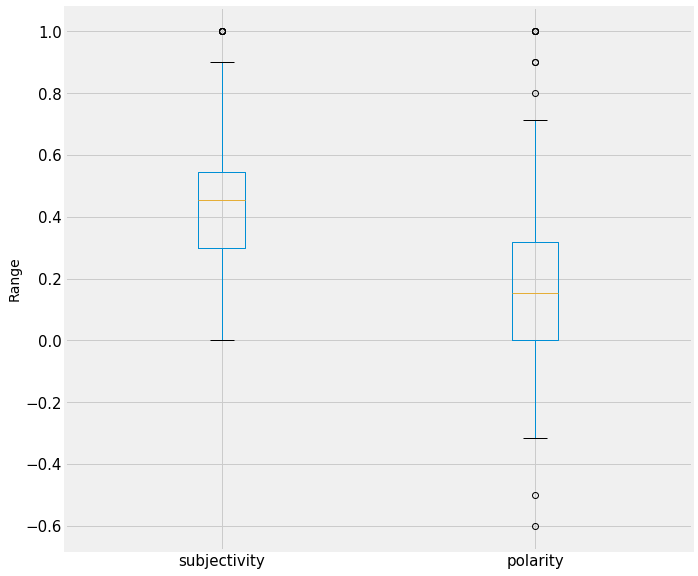

In [11]:
#boxplot for dffilter

boxplot = dffilter.boxplot(column=['subjectivity','polarity'], 
                     fontsize = 15,grid = True, vert=True,figsize=(10,10,))
plt.ylabel('Range')
plt.show()

In [12]:
#covariance and correlation for dffilter
# calculate the covariance between two variables

# prepare data
data1 = dffilter['subjectivity']
data2 = data1 + dffilter['polarity']
# calculate covariance matrix
covariance = cov(data1, data2) 
print(covariance)

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

[[0.05019305 0.08197422]
 [0.08197422 0.19542354]]
Pearsons correlation: 0.82769


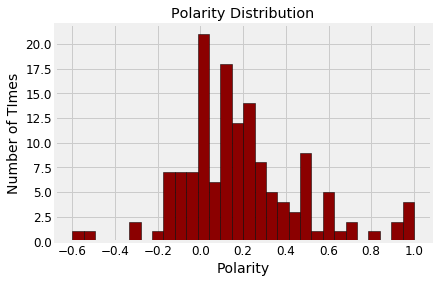

In [13]:
#Polarity Distribution for dffilter

plt.hist(dffilter['polarity'], color = 'darkred', edgecolor = 'black', density=False,
         bins = int(30))
plt.title('Polarity Distribution')
plt.xlabel("Polarity")
plt.ylabel("Number of TImes")

from pylab import rcParams
rcParams['figure.figsize'] = 10,15

plt.show()

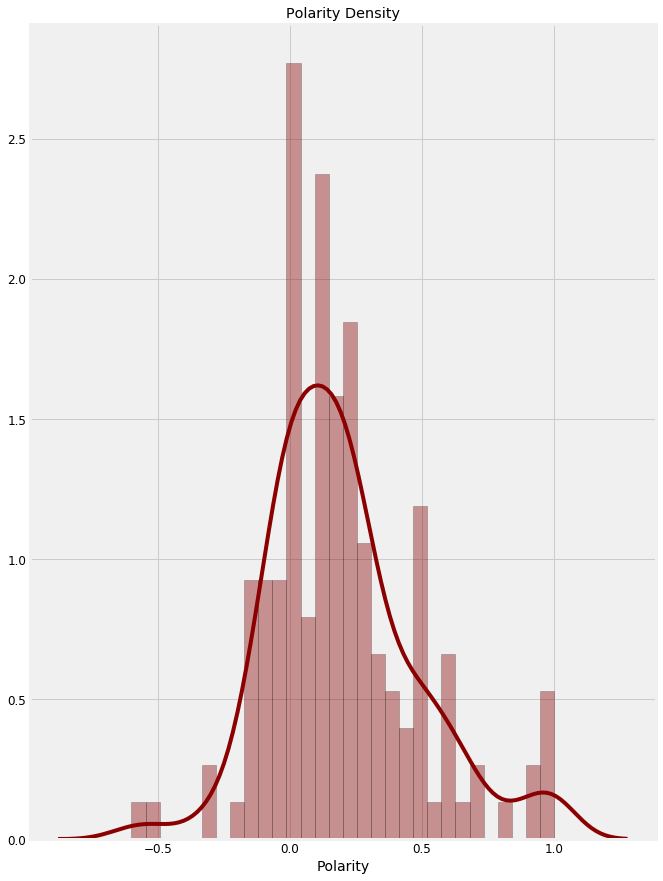

In [14]:
#Polarity Density for dffilter
sns.distplot(dffilter['polarity'], hist=True, kde=True, 
             bins=int(30), color = 'darkred',
             hist_kws={'edgecolor':'black'},axlabel ='Polarity')
plt.title('Polarity Density')

rcParams['figure.figsize'] = 10,15

plt.show()

#### NLP Cleaning and Visualization

In [15]:
#NLP Package
#nltk.download()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saipr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
wt = [word_tokenize(tweet) for tweet in dffilter.tweets] #tokenisation

In [17]:
len_tokens = [] #token count in each item of word_tokens
for i in range(len(wt)):
    len_tokens.append(len(wt[i]))

In [18]:
dffilter['n_tokens'] = len_tokens

In [19]:
#Tokenization
wt = [word_tokenize(tweet) for tweet in dffilter.tweets] #tokenisation
print('original tokens:', wt[0])
cleaned_tokens = [[word for word in item if word.isalpha()] for item in wt]
print('cleaned tokens:', cleaned_tokens)

original tokens: ['Surgical', 'navigation', 'startup', 'wins', 'fourth', 'small', 'business', 'award', 'from', 'NIH', "'s", 'National', 'Heart', ',', 'Lung', ',', 'and', 'Blood', 'Institute', 'to', 'extend', 'novel', 'technology', 'to', 'address', 'peripheral', 'vascular', 'disease', 'https', ':', '//t.co/y6MMqBguWQ']
cleaned tokens: [['Surgical', 'navigation', 'startup', 'wins', 'fourth', 'small', 'business', 'award', 'from', 'NIH', 'National', 'Heart', 'Lung', 'and', 'Blood', 'Institute', 'to', 'extend', 'novel', 'technology', 'to', 'address', 'peripheral', 'vascular', 'disease', 'https'], ['Centerline', 'Biomedical', 'Announces', 'Philip', 'Rackliffe', 'MBA', 'as', 'Chief', 'Executive', 'Officer', 'CEO', 'Effective', 'October', 'https'], ['Centerline', 'Biomedical', 'Announces', 'Philip', 'Rackliffe', 'MBA', 'as', 'Chief', 'Executive', 'Officer', 'CEO', 'Effective', 'October', 'https', 'https'], ['Ohio', 'is', 'full', 'of', 'innovative', 'startups', 'that', 'are', 'changing', 'the',

In [20]:
#Removing Special Characters
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    dffilter['tweets'] = dffilter['tweets'].str.replace(char, ' ')

In [21]:
#Lemmatization
porter = PorterStemmer()
WNlemmatizer = WordNetLemmatizer()
tokens = [word_tokenize(tweet) for tweet in dffilter.tweets]
stemmed_tokens = [[porter.stem(word) for word in tweet] for tweet in tokens]
stemmed_tokens

[['surgic',
  'navig',
  'startup',
  'win',
  'fourth',
  'small',
  'busi',
  'award',
  'from',
  'nih',
  's',
  'nation',
  'heart',
  'lung',
  'and',
  'blood',
  'institut',
  'to',
  'extend',
  'novel',
  'technolog',
  'to',
  'address',
  'peripher',
  'vascular',
  'diseas',
  'http',
  't',
  'co',
  'y6mmqbguwq'],
 ['centerlin',
  'biomed',
  'announc',
  'philip',
  'D',
  'rackliff',
  'mba',
  'as',
  'chief',
  'execut',
  'offic',
  'ceo',
  'effect',
  'octob',
  '21st',
  '2019',
  'http',
  't',
  'co',
  'tt0rxhazjr'],
 ['centerlin',
  'biomed',
  'announc',
  'philip',
  'D',
  'rackliff',
  'mba',
  'as',
  'chief',
  'execut',
  'offic',
  'ceo',
  'effect',
  'octob',
  '21st',
  '2019',
  'http',
  't',
  'co',
  'afadozajvi',
  'http',
  't',
  'co',
  'gyvrxcyah'],
 ['ohio',
  'is',
  'full',
  'of',
  'innov',
  'startup',
  'that',
  'are',
  'chang',
  'the',
  'face',
  'of',
  'biotech',
  '😎',
  'check',
  'out',
  'how',
  'engin',
  'turn',
  'exe

In [22]:
stopwords = nltk.corpus.stopwords.words('english')

In [23]:
#Creating Top Used Words Excluding Stopwrods
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (df.tweets
           .str.lower()
           .replace([r'\|',r'\&',r'\-',r'\.',r'\,',r'\'', RE_stopwords], [' ', '','','','','',''], regex=True)
           .str.cat(sep=' ')
           .split()
)

In [24]:
# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')
rslt

,Frequency
Word,
technology,23
radiation,23
@centerlinebio,21
medical,20
new,19
iops,18
learn,17
centerline,15
study,15


In [25]:
rslt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, technology to risk
Data columns (total 1 columns):
Frequency    10 non-null int64
dtypes: int64(1)
memory usage: 160.0+ bytes


In [26]:
#Updated Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["up", "of", "in", "for", "https","co", "new", "centerline"])

RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (df.tweets
           .str.lower()
           .replace([r'\|',r'\&',r'\-',r'\.',r'\,',r'\'', RE_stopwords], [' ', '','','','','',''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')
rslt

,Frequency
Word,
technology,23
radiation,23
@centerlinebio,21
medical,20
iops,18
learn,17
study,15
risk,15
patients,15


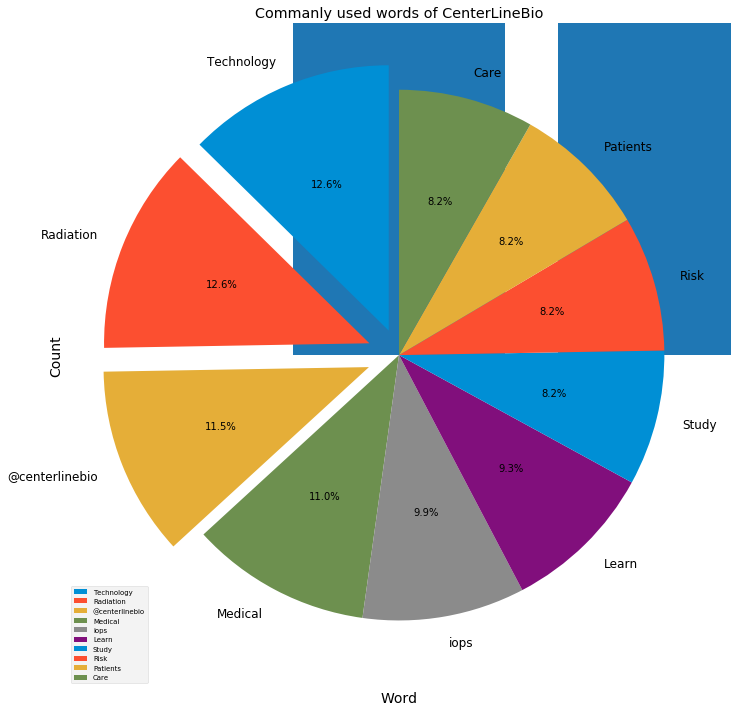

In [27]:
#Generating Pie Chart of Commanly Used Words
rslt_wordcloud = pd.DataFrame(Counter(words).most_common(100),
                    columns=['Word', 'Frequency'])
#BAR CHART
rslt.plot.bar(rot=40, figsize=(16,10), width=0.8,colormap='tab10')
plt.title("Commanly used words of CenterLineBio")
plt.ylabel("Count")

from pylab import rcParams
rcParams['figure.figsize'] = 10,15

#PIE CHART

explode = (0.1, 0.12, 0.122, 0,0,0,0,0,0,0)  # explode 1st slice
labels=['Technology',
        'Radiation',
        '@centerlinebio',
        'Medical',
        'iops',
        'Learn',
        'Study',
        'Risk',
        'Patients',
         'Care']

plt.pie(rslt['Frequency'], explode=explode,labels =labels , autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.legend( labels, loc='lower left',fontsize='x-small',markerfirst = True)
plt.tight_layout()
plt.title('Commanly used words of CenterLineBio')
plt.show()

import matplotlib as mpl
mpl.rcParams['font.size'] = 15.0

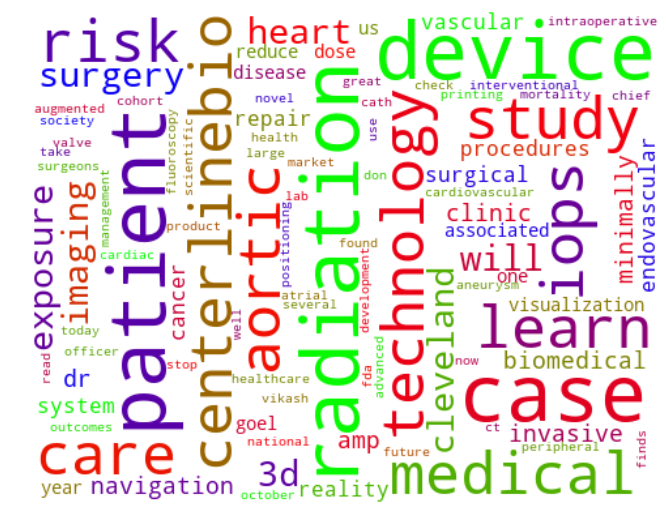

<Figure size 720x720 with 0 Axes>

In [28]:
#Generating Wordcloud
wordcloud = WordCloud(max_font_size=60, max_words=100, width=480, height=380,colormap="brg",
                      background_color="white").generate(' '.join(rslt_wordcloud['Word']))
                      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=[10,10])
plt.show()

#### Time Series Forecasting

In [29]:
#Creating dataframe of polarity and dates only
cols = dffilter[['polarity', 'Dates']]
new = cols.copy()
new.head()

,polarity,Dates
0,0.016667,2020-04-22
3,0.300000,2019-10-22
4,0.300000,2019-10-21
5,0.487500,2019-02-10
6,0.625000,2019-09-20


In [30]:
dffilter

,tweets,sentiment,subjectivity,polarity,Dates,Time,n_tokens
0,Surgical navigation startup wins fourth small ...,"(0.016666666666666663, 0.20000000000000004)",0.200000,0.016667,2020-04-22,12:14:00,31
3,Centerline Biomedical Announces Philip D Rack...,"(0.3, 0.4)",0.400000,0.300000,2019-10-22,18:40:00,23
4,Centerline Biomedical Announces Philip D Rack...,"(0.3, 0.4)",0.400000,0.300000,2019-10-21,19:46:00,26
5,Ohio is full of innovative startups that are c...,"(0.4875, 0.775)",0.775000,0.487500,2019-02-10,20:19:00,40
6,Check out our latest video featuring the Micro...,"(0.625, 0.9)",0.900000,0.625000,2019-09-20,19:33:00,18
...,...,...,...,...,...,...,...
194,Many physicians and staff performing intervent...,"(0.5, 0.5)",0.500000,0.500000,2017-11-13,13:00:00,20
196,Some of the biggest players in the medical dev...,"(0.25, 0.25)",0.250000,0.250000,2017-08-11,18:06:00,30
197,We need to double down on risk ksbosley CE...,"(-0.07777777777777779, 0.14444444444444446)",0.144444,-0.077778,2017-10-25,14:51:00,27
198,CenterlineBio at MIS2017 happy hour https ...,"(1.0, 1.0)",1.000000,1.000000,2017-10-25,14:02:00,11


In [31]:
#Setting date as index
new = new.groupby('Dates')['polarity'].sum().reset_index()
datetime_index = pd.DatetimeIndex(new['Dates'].values)
new = new.set_index(datetime_index)

In [32]:
#Dropping the existing Dates column
new = new.drop(['Dates'], axis = 1)
new.index

DatetimeIndex(['2017-01-12', '2017-04-12', '2017-06-12', '2017-08-11',
               '2017-10-24', '2017-10-25', '2017-11-12', '2017-11-13',
               '2017-11-17', '2017-11-22',
               ...
               '2019-09-01', '2019-09-09', '2019-09-20', '2019-10-05',
               '2019-10-06', '2019-10-21', '2019-10-22', '2019-11-06',
               '2019-12-09', '2020-04-22'],
              dtype='datetime64[ns]', length=132, freq=None)

In [33]:
new.head()

,polarity
2017-01-12,-0.200000
2017-04-12,-0.031818
2017-06-12,0.375000
2017-08-11,0.250000
2017-10-24,0.318182


In [34]:
y = new['polarity'].resample('MS').mean()

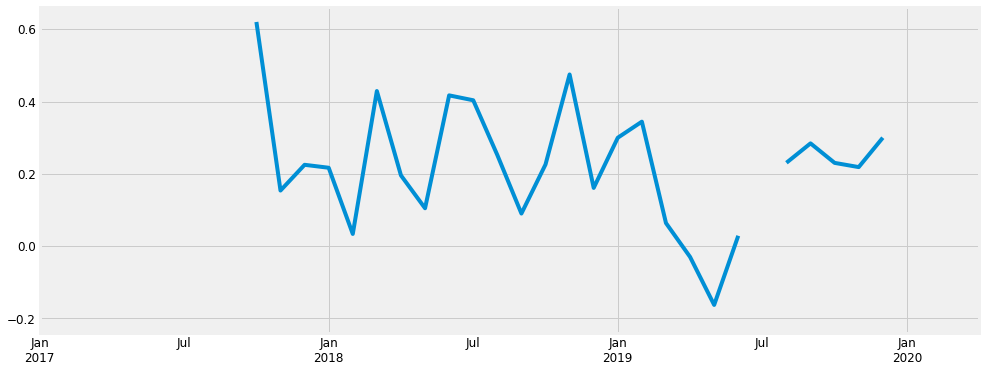

In [35]:
y.plot(figsize=(15, 6))
plt.show()

In [36]:
#ARIMA Model
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [37]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
#mod = sm.tsa.statespace.SARIMAX(y,order=(1, 1, 1),seasonal_order=(1, 1, 0, 12),enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
#print(results.summary().tables[1])
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:9.057257273315022
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3.5817545104417308
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:78.42576364722755
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1.3480637598785963
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:6.448227229656899
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:14.21908945145378


C:\Users\saipr\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1.946435622301105
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4.720404492219391
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-3.1748419104744547
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-8.404812208488643
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:64.75065841230169
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-0.9897234619809279
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-4.606999345286958


C:\Users\saipr\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\saipr\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2.810267390427777
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3.1567917301508954
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1.0307559958297956
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-4.542106545596232
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-5.892813392701825
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:75.81437036688
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:7.827811372558482
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-9.397251358506397
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-4.997493475594759
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:8.116350801920117
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:9.730131326415979
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:2.760721024506654
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-10.60995701291047
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:52.55689737586069
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1.1673635012853572
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-10.316108846942782
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-8.717323299061228
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:6.586895267307832
AR

C:\Users\saipr\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:70.68653966486684
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:8.17337008902901
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-8.729181336300591
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-6.14717116917943
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:7.103066239867097


C:\Users\saipr\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:10.126084008457843
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:3.973389115602012
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-11.259037434380144
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:54.46649331107425
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:0.2923159165985645
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-7.267930766361891
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-6.6044429566972624
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:7.731367606732393
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2.407561857745173


C:\Users\saipr\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [38]:
#ARIMA Summary
mod = sm.tsa.statespace.SARIMAX(y,order=(1, 1, 1),seasonal_order=(0, 0, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3661      0.288      1.272      0.203      -0.198       0.930
ma.L1         -1.0001    391.931     -0.003      0.998    -769.170     767.170
ma.S.L12      -0.0484      0.338     -0.143      0.886      -0.711       0.614
sigma2         0.0204      8.012      0.003      0.998     -15.682      15.723


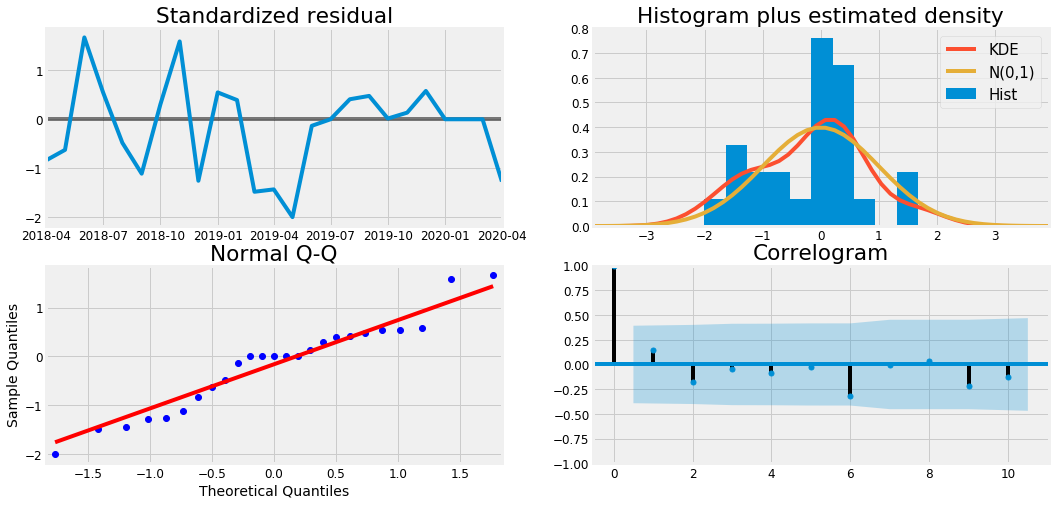

In [39]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [40]:
#Calculating Mean Square Error and Root Mean Square Error
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 0.05
The Root Mean Squared Error of our forecasts is 0.22


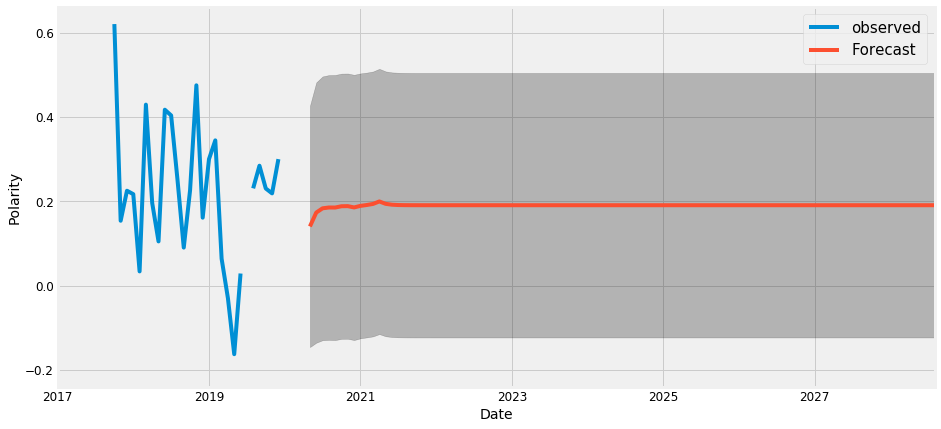

In [41]:
#Forecasting Model
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Polarity')
plt.legend()
plt.show()

In [42]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.polarity.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -13.454244
p-value: 0.000000


In [43]:
from statsmodels.tsa.arima_model import ARIMA
modellll = ARIMA(df.polarity, order=(1,1,2))
modellll_fit = modellll.fit(disp=0)
print(modellll_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.polarity   No. Observations:                  199
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 -14.856
Method:                       css-mle   S.D. of innovations              0.259
Date:                Tue, 23 Jun 2020   AIC                             39.712
Time:                        22:25:10   BIC                             56.179
Sample:                             1   HQIC                            46.376
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0002      0.001      0.239      0.811      -0.001       0.002
ar.L1.D.polarity    -1.0000      0.013    -75.799      0.000      -1.026      -0.974
ma.L1.D.polarity     0.0390 

C:\Users\saipr\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [44]:
model2 = ARIMA(df.polarity, order=(1,1,1))
model2_fit = model2.fit(disp=0)
print(model2_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.polarity   No. Observations:                  199
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -14.117
Method:                       css-mle   S.D. of innovations              0.256
Date:                Tue, 23 Jun 2020   AIC                             36.235
Time:                        22:25:11   BIC                             49.408
Sample:                             1   HQIC                            41.567
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9.451e-05      0.000      0.287      0.774      -0.001       0.001
ar.L1.D.polarity     0.0465      0.071      0.655      0.513      -0.093       0.186
ma.L1.D.polarity    -1.0000 

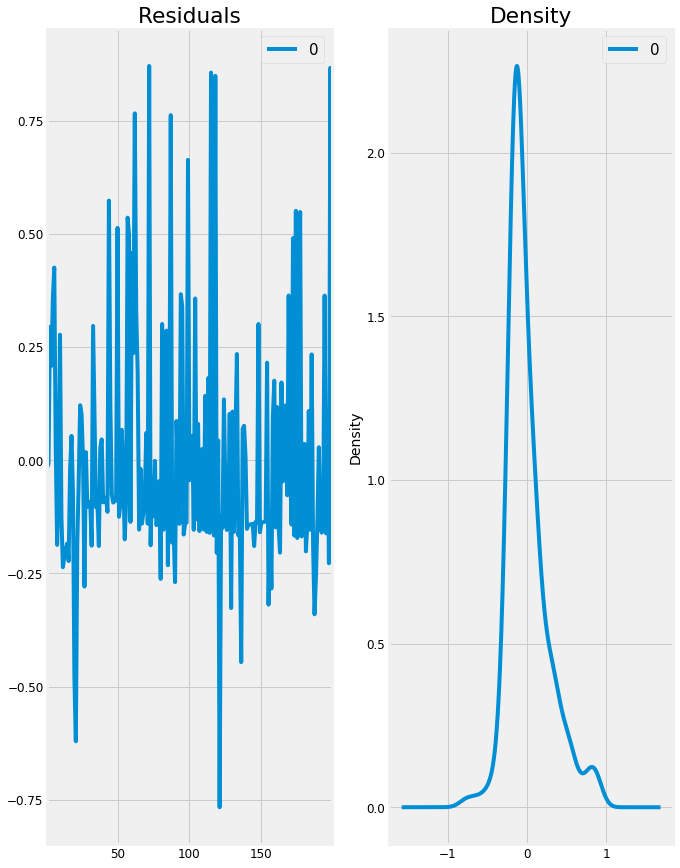

In [45]:
residuals = pd.DataFrame(model2_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

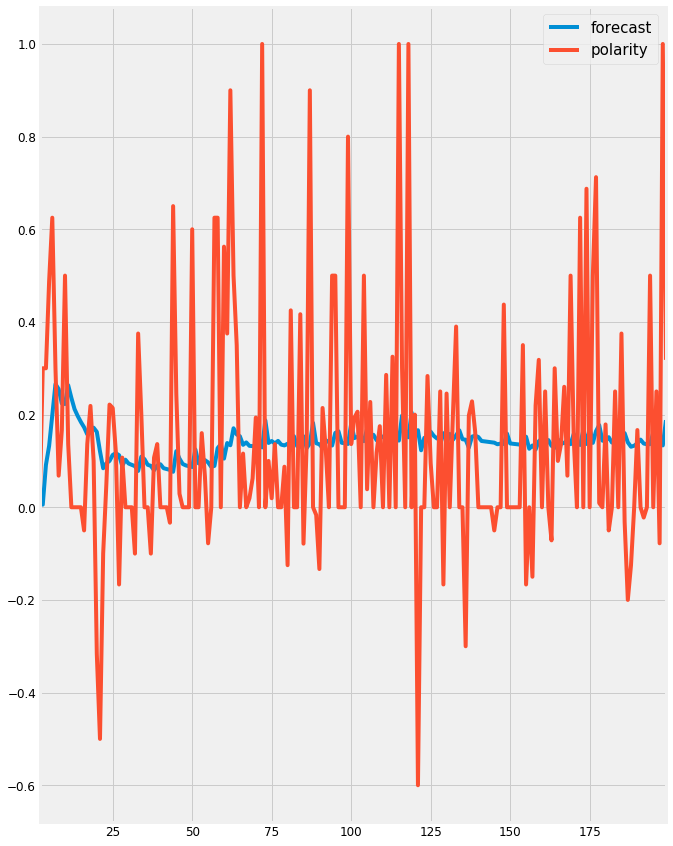

In [46]:
model2_fit.plot_predict(dynamic=False)
plt.show()

In [47]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
trainn = df.polarity[:85]
testn = df.polarity[85:]

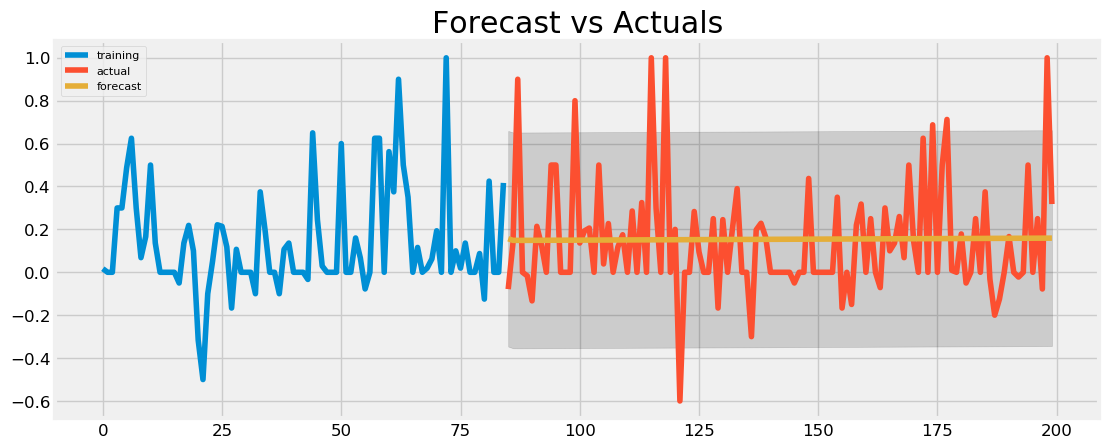

In [48]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
modelf = ARIMA(trainn, order=(1, 1, 1))  
fitted = model2.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(115, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=testn.index)
lower_series = pd.Series(conf[:, 0], index=testn.index)
upper_series = pd.Series(conf[:, 1], index=testn.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(trainn, label='training')
plt.plot(testn, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()